In [660]:
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'none'
import numpy as np
import cv2
import math


In [661]:
def display_images(imgs, titles, width=5):
    n = len(imgs)
    rows = math.ceil(n / 3)
    cols = n // rows
    h, w = imgs[0].shape[:2]
    fig, axs = plt.subplots(rows, cols, figsize=(width * cols, width * h / w * rows))
    axs = axs.flatten()
    for i in range(rows * cols):
        if i < n:
            img = imgs[i]
            axs[i].imshow(img, cmap='gray' if img.ndim == 2 else None)
            axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()


def to_float(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def to_uint8(img):
    norm = (img - np.min(img)) / (np.max(img) - np.min(img))
    return (norm * 255).astype(np.uint8)

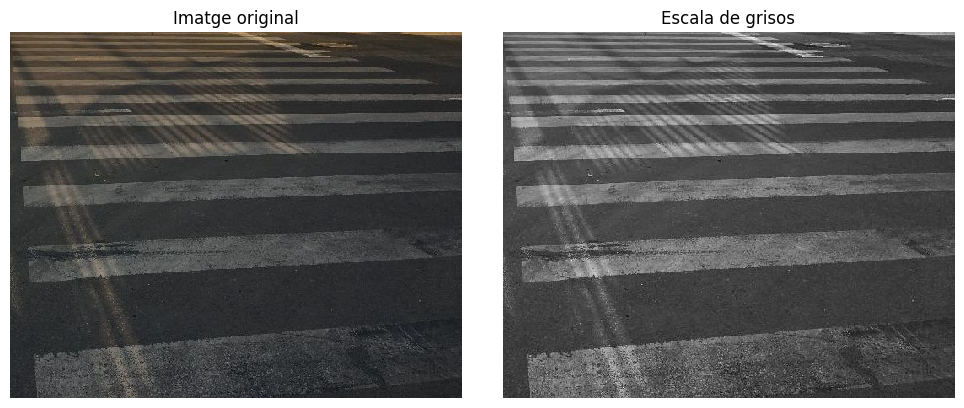

In [662]:
path = "../data/examples_cropped/heon_IMG_0534.JPG" # Ombres
# path = "../data/examples_cropped/heon_IMG_0520.JPG" # Il·luminació horrible
# path = "../data/examples_cropped/sam_IMG_6482.jpg" # Neu

img = plt.imread(path).astype(np.float32) / 255
height, width, channels = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display_images([img, gray], ['Imatge original', 'Escala de grisos'])

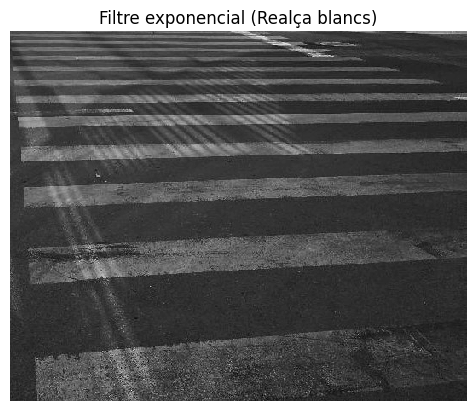

In [663]:
exp = np.pow(np.e, gray)
exp = to_float(exp)

plt.imshow(exp, cmap='gray')
plt.title('Filtre exponencial (Realça blancs)')
plt.axis('off')
plt.show()

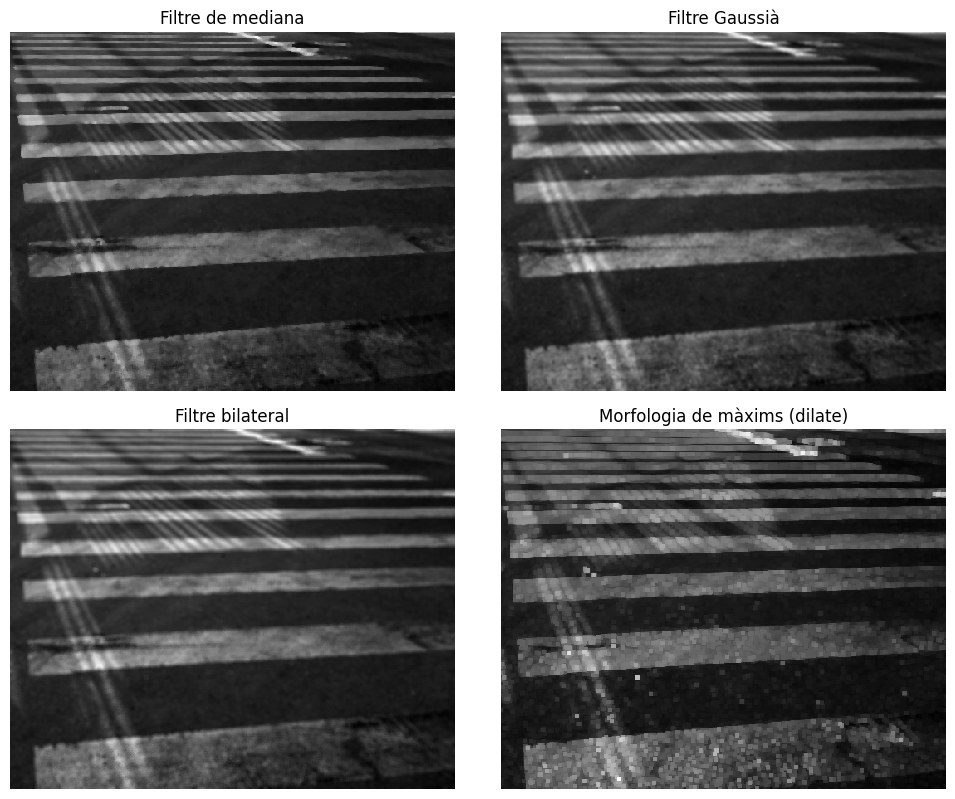

In [664]:
src = exp

med = cv2.medianBlur(src, 5)

bilat = cv2.bilateralFilter(src, d=6, sigmaColor=75, sigmaSpace=75)

sigma = 1.5
ksize = round(6 * sigma + 1)
ksize = ksize + 1 - (ksize % 2)
blur = cv2.GaussianBlur(src, (ksize, ksize), sigma)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
max = cv2.morphologyEx(src, cv2.MORPH_DILATE, kernel)


display_images([med, blur, bilat, max], ['Filtre de mediana', 'Filtre Gaussià', 'Filtre bilateral', 'Morfologia de màxims (dilate)'])

In [665]:
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 2001, 2)
# plt.imshow(thresh, cmap="grey")
# plt.axis('off')
# plt.show()

In [666]:
# src = med

# temp = to_uint8(med)
# sigma = 2
# ksize = round(6 * sigma + 1)
# ksize = ksize + 1 - (ksize % 2)
# # src_filtered = cv2.medianBlur(temp, 11)
# src_filtered = cv2.GaussianBlur(src, (5, 5), 0)

# hist = cv2.calcHist([src], [0], None, [256], [0, 1])
# plt.bar(range(len(hist)), hist.flatten(), width=1.0)
# plt.title('Histograma de l\'imatge')
# plt.xlim(0, 256)
# plt.show()

# hist = cv2.calcHist([src_filtered], [0], None, [256], [0, 1])
# plt.bar(range(len(hist)), hist.flatten(), width=1.0)
# plt.title('Histograma de l\'imatge filtrada')
# plt.xlim(0, 256)
# plt.show()

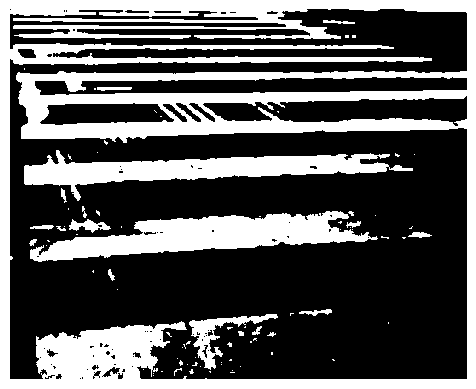

0.2823529411764706

In [670]:
src = med
src_uint8 = to_uint8(src)

thr, bin = cv2.threshold(src_uint8, 0, 256, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin, cmap="grey")
plt.axis('off')
plt.show()
thr/ 255

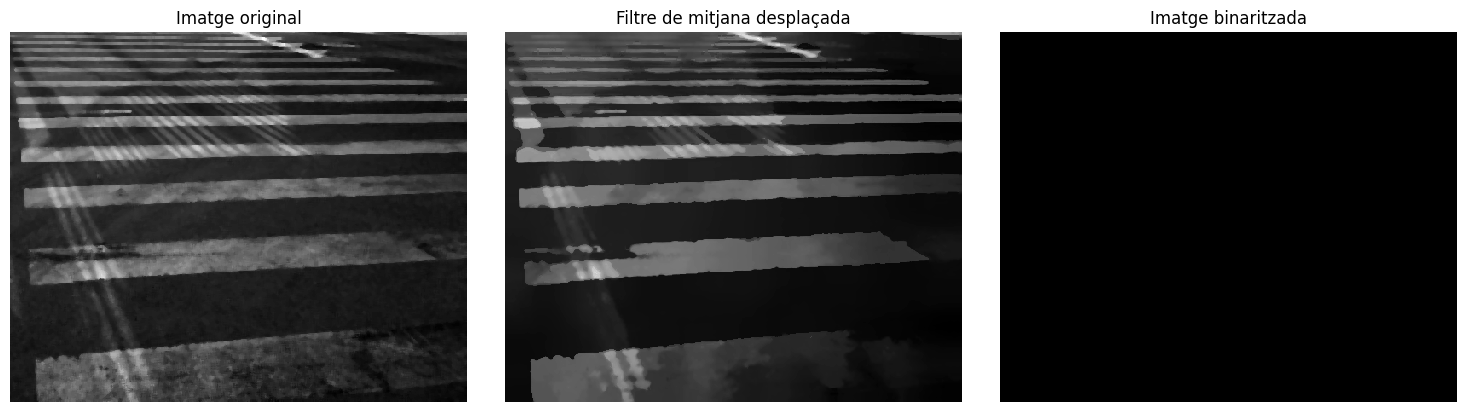

In [668]:
src = med

src_blur = cv2.GaussianBlur(to_uint8(src), (5, 5), 0)
src_bgr = cv2.cvtColor(src_blur, cv2.COLOR_GRAY2BGR)
seg = cv2.pyrMeanShiftFiltering(src_bgr, sp=20, sr=30)
seg = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)
bin = seg > (thr / 255)

display_images([src, seg, bin], ['Imatge original', 'Filtre de mitjana desplaçada', 'Imatge binaritzada'])

In [669]:
src = med

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
n = 60
kernel = cv2.resize(bin, (n, n), interpolation=cv2.INTER_NEAREST)
background = cv2.morphologyEx(med, cv2.MORPH_OPEN, kernel)
top_hat = src - background

display_images([src, background, top_hat], ['Imatge base', 'Background', 'Top-hat'])

plt.imshow(kernel, cmap='gray')
plt.title('Kernel')
plt.axis('off')
plt.show()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src data type = bool is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
# # kernel = np.ones((1, 1), np.uint8)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))


# morph = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)
# morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# axes[0].imshow(thr, cmap="gray")
# axes[0].axis('off')

# axes[1].imshow(morph, cmap="gray")
# axes[1].axis('off')

# plt.tight_layout()
# plt.show()

In [ ]:
# feature_map = np.abs(feature_map)
# feature_map = 255 * (feature_map - np.min(feature_map))/(np.max(feature_map)-np.min(feature_map))
# feature_map = feature_map.astype(np.uint8)
# plt.imshow(feature_map, cmap="gray")
# plt.axis('off')

In [ ]:
# edges = cv2.Canny(eq, threshold1=50, threshold2=100, apertureSize=3)
# plt.imshow(edges, cmap="grey")
# plt.axis('off')
# plt.show()

In [ ]:
# # imagen_suavizada = cv2.GaussianBlur(eq, (5, 5), 0)
# bordes_log = cv2.Laplacian(morph, cv2.CV_64F)
# bordes_log = np.uint8(np.absolute(bordes_log))

# # cv2.imshow('Bordes LoG', bordes_log)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [ ]:
# lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=150)

# img_lines = img.copy()

# if lines is not None:
#     for line in lines:
#         rho, theta = line[0]
#         a, b = np.cos(theta), np.sin(theta)
#         x0, y0 = a*rho, b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*( a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*( a))
#         cv2.line(img_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

# plt.imshow(img_lines)
# plt.axis('off')
# plt.show()


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=150, minLineLength=50, maxLineGap=100)

# img_lines = img.copy()

# if lines is not None:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(img_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

# plt.imshow(img_lines)
# plt.axis('off')
# plt.axis('off')
# plt.show()


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.transform import hough_line
# from skimage import color, feature

# img = cv2.imread(path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# edges_skimage = feature.canny(gray)

# hspace, angles, dists = hough_line(edges_skimage)

# plt.figure(figsize=(8, 6))
# plt.imshow(hspace, extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), dists[-1], dists[0]],
#            cmap='Reds', aspect='auto')
# plt.title('Acumulador Hough (skimage)')
# plt.xlabel('Ángulo (grados)')
# plt.ylabel('Distancia (píxeles)')
# plt.show()

In [ ]:
# # Calcular imagen integral
# integral = cv2.integral(gray)

# # Tamaño de la ventana
# w, h = 8, 8
# half_h = h // 2

# # Crear un mapa para guardar los valores de la feature
# feature_map = np.zeros((gray.shape[0] - h, gray.shape[1] - w))

# # Función para suma de rectángulo
# def rect_sum(ii, x, y, w, h):
#     A = ii[y][x]
#     B = ii[y][x + w]
#     C = ii[y + h][x]
#     D = ii[y + h][x + w]
#     return D - B - C + A

# # Escanear con ventana deslizante
# for y in range(0, gray.shape[0] - h):
#     for x in range(0, gray.shape[1] - w):
#         top = rect_sum(integral, x, y, w, half_h)
#         bottom = rect_sum(integral, x, y + half_h, w, half_h)
#         feature_value = top - bottom
#         feature_map[y, x] = feature_value

# # Visualizar el mapa de valores
# plt.figure(figsize=(10, 6))
# plt.imshow(feature_map, cmap='seismic', interpolation='nearest')
# plt.colorbar(label='Haar-like Feature Value')
# plt.title('Mapa de características Haar-like (dos rectángulos horizontales)')
# plt.axis('off')
# plt.show()